In [38]:
import pandas as pd 
import numpy as np 


In [39]:
flooding_ct_dataset = pd.read_csv('flooding_ct_dataset.csv')

In [40]:
p_at_least_1_estimate = pd.read_csv("/share/ju/matt/street-flooding/runs/icar_none/simulated_False/ahl_True/20241021-1038/estimate_at_least_one_positive_image_by_area.csv")
p_at_least_1_estimate['tract_id'] = p_at_least_1_estimate['tract_id'].astype(int)

In [41]:
flooding_ct_dataset = flooding_ct_dataset.merge(p_at_least_1_estimate, left_on='GEOID', right_on='tract_id', how='left')

In [42]:
(flooding_ct_dataset['n_total'] == flooding_ct_dataset['n_images_by_area']).all()

True

In [43]:
flooding_ct_dataset['at_least_one_positive_image_by_area']

0       0.000000
1       0.316839
2       1.000000
3       0.223001
4       0.486426
          ...   
2322    0.116365
2323    0.355916
2324    0.579602
2325    0.283722
2326    0.275766
Name: at_least_one_positive_image_by_area, Length: 2327, dtype: float64

In [44]:
(flooding_ct_dataset['n_classified_positive'] > 0).value_counts()

n_classified_positive
False    1846
True      481
Name: count, dtype: int64

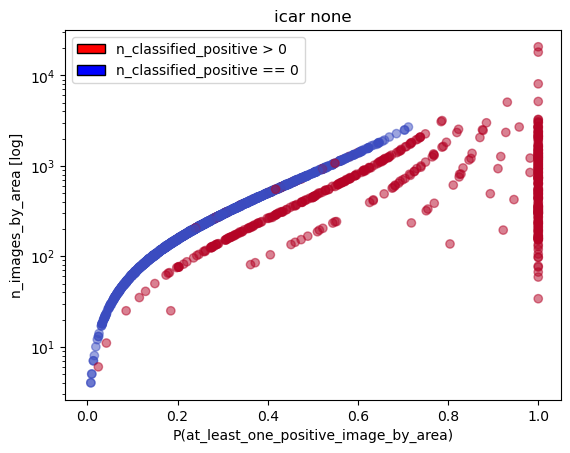

In [45]:
# scatterplot of at_least_one_positive_image_by_area vs. n_images_by_area
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(flooding_ct_dataset['at_least_one_positive_image_by_area'], flooding_ct_dataset['n_images_by_area'], c=flooding_ct_dataset['n_classified_positive'] > 0, cmap='coolwarm', alpha=0.5)

# log y scale 
ax.set_yscale('log')

ax.set_xlabel('P(at_least_one_positive_image_by_area)')
ax.set_ylabel('n_images_by_area [log]')

ax.set_title('icar none')

# custom legend patches 
from matplotlib.patches import Patch

legend_elements = [Patch(facecolor='red', edgecolor='black', label='n_classified_positive > 0'),
                     Patch(facecolor='blue', edgecolor='black', label='n_classified_positive == 0')]

ax.legend(handles=legend_elements)

plt.savefig('icar_none_at_least_one_positive_image_by_area_vs_n_images_by_area_colored_classified_positive.png')



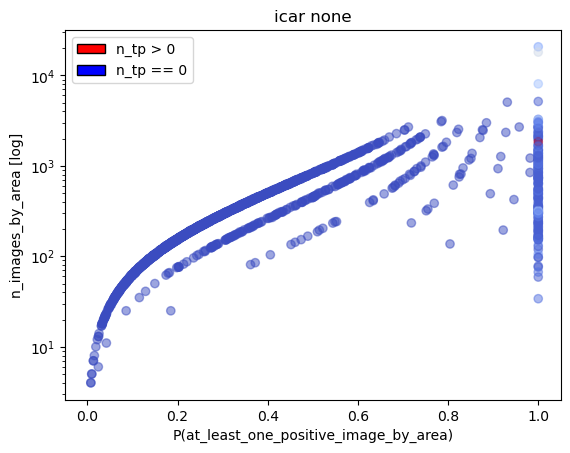

In [46]:
# repeat the above plot, but color by n_tp 
fig, ax = plt.subplots()

ax.scatter(flooding_ct_dataset['at_least_one_positive_image_by_area'], flooding_ct_dataset['n_images_by_area'], c=flooding_ct_dataset['n_tp'], cmap='coolwarm', alpha=0.5)

# log y scale
ax.set_yscale('log')

ax.set_xlabel('P(at_least_one_positive_image_by_area)')
ax.set_ylabel('n_images_by_area [log]')

ax.set_title('icar none')

# custom legend patches
from matplotlib.patches import Patch

legend_elements = [Patch(facecolor='red', edgecolor='black', label='n_tp > 0'),
                     Patch(facecolor='blue', edgecolor='black', label='n_tp == 0')]
ax.legend(handles=legend_elements)

plt.savefig('icar_none_at_least_one_positive_image_by_area_vs_n_images_by_area_colored_tp.png')

In [47]:
flooding_ct_dataset.columns

Index(['CTLabel', 'BoroCode', 'BoroName', 'CT2020', 'BoroCT2020', 'CDEligibil',
       'NTAName', 'NTA2020', 'CDTA2020', 'CDTANAME', 'GEOID', 'PUMA',
       'Shape_Leng', 'Shape_Area', 'geometry', 'n_total',
       'n_classified_positive', 'n_tp', 'n_fp', 'n_tn', 'n_fn',
       'total_not_annotated', 'positives_not_annotated',
       'negatives_not_annotated', 'tract_id', 'empirical_estimate',
       'at_least_one_positive_image_by_area',
       'at_least_one_positive_image_by_area_CI_lower',
       'at_least_one_positive_image_by_area_CI_upper', 'n_images_by_area'],
      dtype='object')